## Import Dependencies

In [1]:
# Import depdendencies
import pandas as pd

## Read in the Dataset

In [2]:
# Read in the CSV
dataset = "../Data/dataset.csv"

df = pd.read_csv(dataset)

In [3]:
# Display the training dataset
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Data Exploration

## Data Pre-Processing - Feature Data

In [4]:
# create a new diseases_df copy of initial df
diseases_df = df.copy()

In [5]:
# Review which diseases are in the new dataset
diseases_df['Disease'].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

In [6]:
# Separate the Features from the Outputs
X = diseases_df.drop(columns='Disease')
y = diseases_df['Disease']

In [7]:
# Review the features data
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X, dtype=int)

In [9]:
# Review the features data after applying get_dummies
X.head()

,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chest_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,Symptom_1_ cough,...,Symptom_14_ congestion,Symptom_14_ phlegm,Symptom_14_ red_spots_over_body,Symptom_15_ blood_in_sputum,Symptom_15_ chest_pain,Symptom_15_ loss_of_smell,Symptom_16_ blood_in_sputum,Symptom_16_ loss_of_smell,Symptom_16_ muscle_pain,Symptom_17_ muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Remove the "Symptom_X_ " from the column titles by defining a function
# Found code for "str.lstrip" here: https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas
def remove_prefix(df, prefix):
    df.columns=df.columns.str.lstrip(prefix)


remove_prefix(X, 'Symptom_1_ ')
remove_prefix(X, '2_ ')
remove_prefix(X, '3_ ')
remove_prefix(X, '4_ ')
remove_prefix(X, '5_ ')
remove_prefix(X, '6_ ')
remove_prefix(X, '7_ ')
remove_prefix(X, '8_ ')
remove_prefix(X, '9_ ')
remove_prefix(X, '0_ ')

In [11]:
# Review the new dataframe headers
X.head()

,acidity,back_pain,bladder_discomfort,breathlessness,burning_micturition,chest_pain,chills,constipation,continuous_sneezing,cough,...,congestion,phlegm,red_spots_over_body,blood_in_sputum,chest_pain,loss_of_smell,blood_in_sputum,loss_of_smell,muscle_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Add the columns with duplicate headers and then remove the duplicates
# Found code for this here: https://stackoverflow.com/questions/58809851/how-can-i-add-the-values-of-pandas-columns-with-the-same-name
X=X.groupby(level=0,axis=1).sum()

# Correct some of the columnn names and regroup
X=X.rename(columns={"alpitations": "palpitations"})
X=X.rename(columns={"ain_during_bowel_movements": "pain_during_bowel_movements"})
X=X.rename(columns={"alaise": "malaise"})
X=X.groupby(level=0,axis=1).sum()
X.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,atches_in_throat,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Review the columns to confirm that all the duplicates were removed
X.columns

Index(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety',
       'atches_in_throat', 'back_pain', 'belly_pain', 'blackheads',
       ...
       'vomiting', 'watering_from_eyes', 'weakness_in_limbs',
       'weakness_of_one_body_side', 'weight_gain', 'weight_loss',
       'yellow_crust_ooze', 'yellow_urine', 'yellowing_of_eyes',
       'yellowish_skin'],
      dtype='object', length=138)

## Data Analysis through Data Visualization

In [14]:
# Concatenate the dataframes to perform some analysis on the dataset
df_concat = pd.concat([y, X], axis=1)
df_concat.head()

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,atches_in_throat,back_pain,belly_pain,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Groupby the disease and sum the columns
disease_groupby = df_concat.groupby(['Disease']).sum()
disease_groupby

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,atches_in_throat,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
Disease,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,114,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,0,0,0,0,0,0,0,0,108,...,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,114,0,0,0,0,0,0,0,0,0,...,114,0,0,0,0,0,0,0,0,108
Allergy,0,0,0,0,0,0,0,0,0,0,...,0,108,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,108,0,0,...,0,0,108,0,0,0,0,0,0,0
Chicken pox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Define a function for plotting different symptoms vs the diseases
def plot_diseases(df, y):
    df.plot.bar(y=y, use_index=True, ylabel=y)

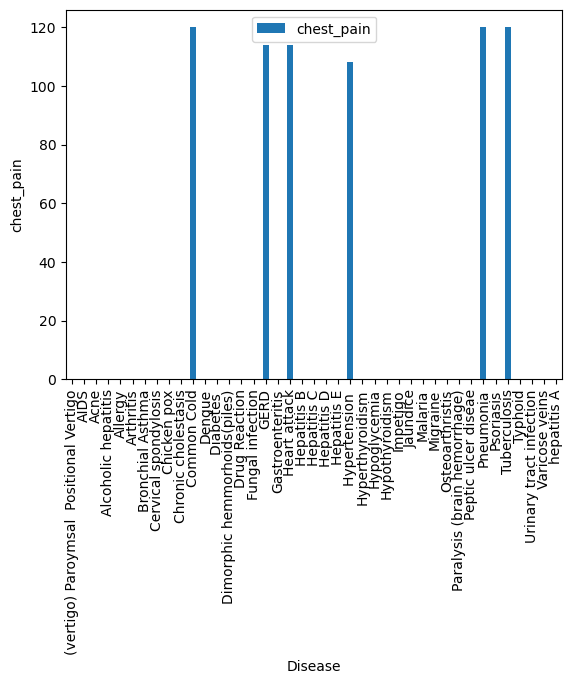

In [17]:
# Plot for chest_pain
plot_diseases(disease_groupby, 'chest_pain')

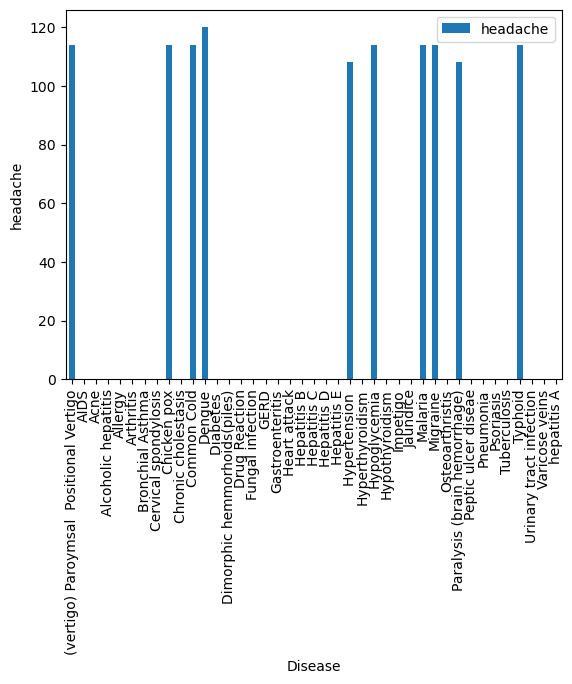

In [18]:
# Plot for headache
plot_diseases(disease_groupby, 'headache')

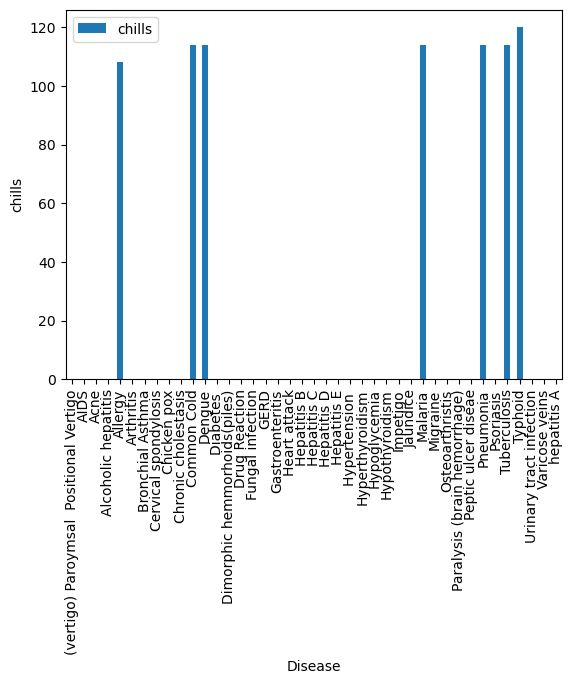

In [19]:
# Plot for chills
plot_diseases(disease_groupby, 'chills')

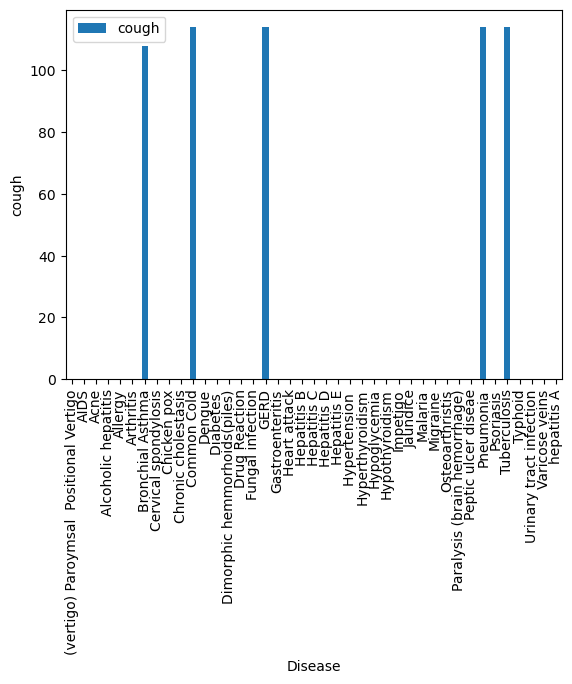

In [20]:
# Plot for cough
plot_diseases(disease_groupby, 'cough')

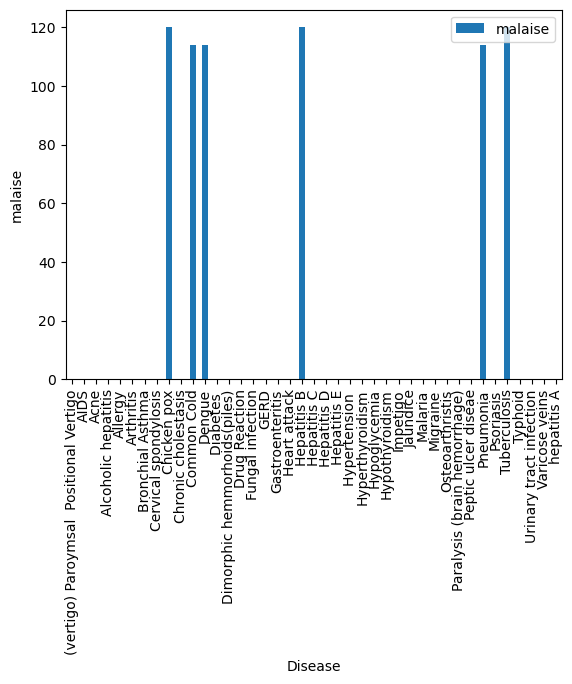

In [21]:
# Plot for malaise
plot_diseases(disease_groupby, 'malaise')

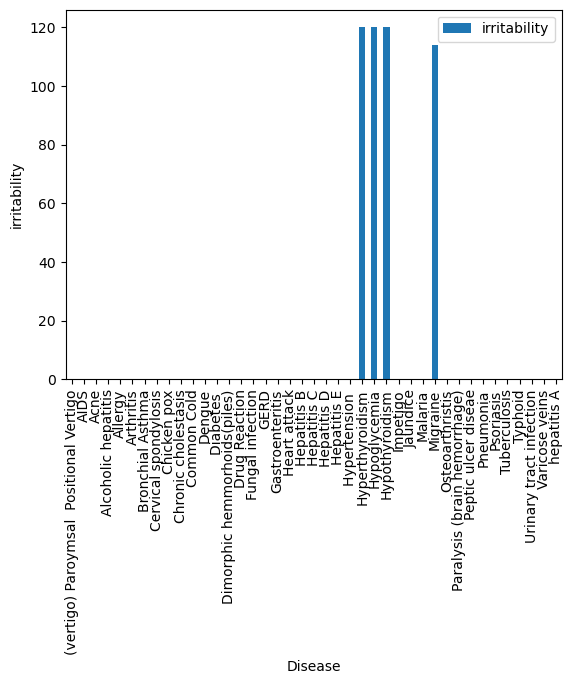

In [22]:
# Plot for irritability
plot_diseases(disease_groupby, 'irritability')

## Data Pre-Processing - Output Data

In [23]:
# Review the output data
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: Disease, dtype: object

In [24]:
# Convert the diseases to numerical values
diseases = y.unique()
nums = list(range(0, 41))
y = y.replace(diseases, nums)

In [25]:
# Confirm that the diseases were replaced with integers
y.value_counts()

Disease
0     120
21    120
23    120
24    120
25    120
26    120
27    120
28    120
29    120
30    120
31    120
32    120
33    120
34    120
35    120
36    120
37    120
38    120
39    120
22    120
20    120
1     120
19    120
2     120
3     120
4     120
5     120
6     120
7     120
8     120
9     120
10    120
11    120
12    120
13    120
14    120
15    120
16    120
17    120
18    120
40    120
Name: count, dtype: int64

In [26]:
# Concatenate the encoded features and output data
data_encoded = pd.concat([X, y], axis=1)
data_encoded = data_encoded.reset_index()

In [27]:
# Drop the "index" column
data_encoded = data_encoded.drop(columns="index")
data_encoded

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,atches_in_throat,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4916,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,37
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39


In [28]:
# Save the newly encoded dataset to a csv file
data_encoded.to_csv('../Data/encoded_data.csv', index=False)